### SVD Martices

a)

If to denote the column vector $v_{\alpha}$ in matrix **V**, then it will be the row vectors in **$V_{T}$** space. 

Column of matrix **U**, diagonals **$\Sigma$** and row of matrix **$V_{T}$**, they all have dimension of $\alpha$, thus to index all of them with same $\alpha$:
$$
A = U \Sigma V_{T}   \\
  = \begin{bmatrix} |&&| \\ u_{1} &\cdots& u_{\alpha} \\ |&&| \end{bmatrix}
    \begin{bmatrix} \sigma_{1}& & \\  &\ddots& \\ &&\sigma_{\alpha} \end{bmatrix}
    \begin{bmatrix} -&v_{1}&- \\ &\vdots& \\ -&v_{\alpha}&- \end{bmatrix}
$$ 
The operation of multiplying a diagonal matrix to another matrix is that: if from behind, applying a factor of $\sigma_{\alpha}$ to each column; if from the front, applying a factor of $\sigma_{\alpha}$ to each row. Here is from the front, thus **rows**:
$$
  = \begin{bmatrix} |&&| \\ u_{1} &\cdots& u_{\alpha} \\ |&&| \end{bmatrix}
    \begin{bmatrix} -&\sigma_{1}v_{1}&- \\ &\vdots& \\ -&\sigma_{i}v_{\alpha}&- \end{bmatrix} 
$$
K is the dimension of column vectors of matrix **U**, in other word, number of rows, in other word, **U** is a $K\times \alpha$ matrix. But that won't matter much because we want to put it in column vector view.
$$
  = \begin{bmatrix} 
    \sum_{i = 1}^{\alpha} u_{1i}\sigma{i}v_{1i} &\cdots& \sum_{i = 1}^{\alpha} u_{1i}\sigma{i}v_{\alpha i} \\
    \vdots & \ddots & \vdots \\
    \sum_{i = 1}^{\alpha} u_{Ki}\sigma{i}v_{1i} &\cdots& \sum_{i = 1}^{\alpha} u_{Ki}\sigma{i}v_{\alpha i}
    \end{bmatrix}
$$ 

$$
  = \begin{bmatrix}
    |&&| \\
    \sum_{i = 1}^{\alpha} u_{i}\sigma{i}v_{1i} &\cdots& \sum_{i = 1}^{\alpha} u_{i}\sigma{i}v_{\alpha i} \\
    |&&| \\
    \end{bmatrix}
$$

$$
  = \sum_{i = 1}^{\alpha} \begin{bmatrix}
    |&&| \\
    \sigma_{i} v_{1 i} u_{i} &\cdots& \sigma_{i} v_{\alpha i} u_{i} \\
    |&&| \end{bmatrix}
$$

$$
  = \sum_{i = 1}^{\alpha} \begin{bmatrix}
    \sigma_{i} v_{1 i} u_{1i} &\cdots& \sigma_{i} v_{\alpha i} u_{1i}\\
    \vdots & \ddots & \vdots \\
    \sigma_{i} v_{1 i} u_{Ki} &\cdots& \sigma_{i} v_{\alpha i} u_{Ki} \\
    \end{bmatrix}
$$

$$
  = \sum_{i = 1}^{\alpha} \sigma_{i}
    \begin{bmatrix}
    u_{1i} \\ \vdots \\ u_{Ki}
    \end{bmatrix}
    \begin{bmatrix}
    v_{1i} & \vdots & v_{\alpha i}
    \end{bmatrix}
$$
Then, in the form of the outer product $\otimes$, just to take the last element transpose, then it will be in column vector:
$$
A = \sum_{i = 1}^{\alpha} \sigma_{i} u_{i} \otimes v_{i}^{T}
$$
Which in a cleaner form:
$$
A = \sum_{\alpha} \sigma_{\alpha} u_{\alpha} v_{\alpha}^{T}
$$
Q.E.D.

b)

The results are shown below. The summation is indeed **equivalent** to original matrix **A**. Because the difference between, shown in the third Fig, is at the scale of **round-off error**.

<Figure size 640x480 with 0 Axes>

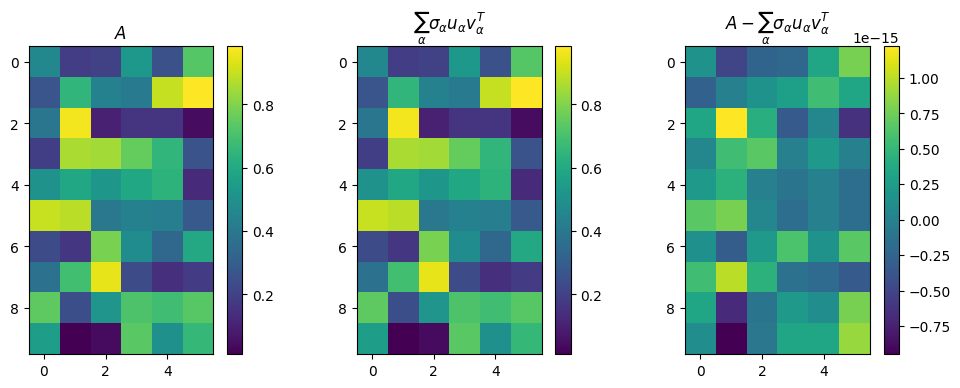

In [2]:
import numpy as np
import scipy.linalg as sllg 
import matplotlib.pyplot as plt


rng = np.random.default_rng()

# summation of column vector outer product
# for convenience, I code part (c) together here:
def sum_comp(u, sigma, vt, truncate = False, stop = 0):
    sum_matrix = np.zeros(shape= np.shape(u))

    if truncate ==False:
        for i in range(len(sigma)):
            sum_matrix += sigma[i] * np.outer(u[:, i], vt.transpose()[:, i])
        return sum_matrix
    
    if truncate ==True:
        for i in range(stop):
            sum_matrix += sigma[i] * np.outer(u[:, i], vt.transpose()[:, i])
        return sum_matrix


# This functioin is imported from the examples in class notes
def plot_matrices(A,titles=[]):
    n = len(A)
    if titles==[]:
        titles = [""]*n
    if n>4:
        nx = 4
    else:
        nx = n
    for j in range(int(np.floor(n/4))+1):        
        plt.clf()
        plt.figure(figsize=(nx*4,4))
        jmax = 4*(j+1)
        if jmax > n:
            jmax = n
        for i,AA in enumerate(A[4*j:jmax]):
            plt.subplot(1, nx, i+1)
            plt.imshow(AA)
            plt.colorbar()
            plt.title(titles[4*j + i])
        plt.show()

matrixA = rng.uniform(size=(10, 6))
U, Sdiag, VT = np.linalg.svd(matrixA, full_matrices=False)

plot_matrices( [matrixA, sum_comp(U, Sdiag, VT), matrixA - sum_comp(U, Sdiag, VT)],
              titles= [r"$A$", r"$\sum_{\alpha} \sigma_{\alpha}u_{\alpha} v_{\alpha}^{T}$"
                       , r"$A - \sum_{\alpha} \sigma_{\alpha}u_{\alpha} v_{\alpha}^{T}$"])


c)

The results are shown below. The decay of errors is **almost linear**. Note that the ratio of matrix row and column dimension affects the rate of changes in error. The higher the diffenece of the row and column dimensions is, the curve tend to shift to concave up.

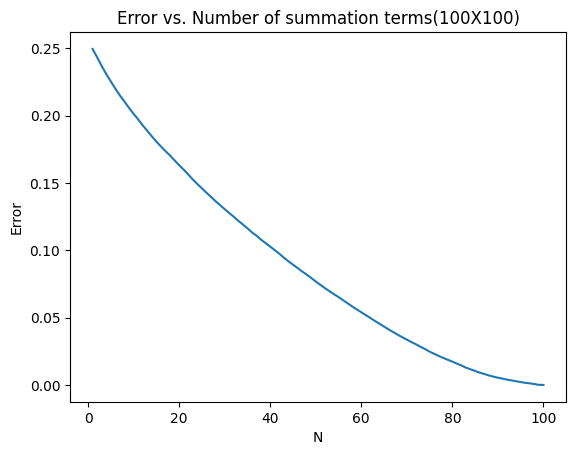

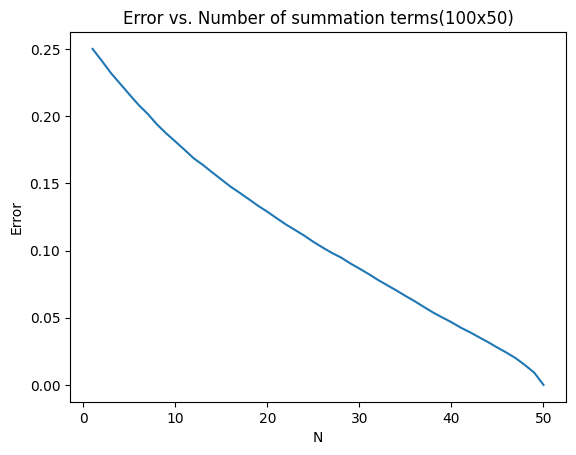

In [3]:
# choose another bigger matrix
x_dimension = 100
y_dimension = 100

B = rng.uniform(size=(x_dimension, y_dimension))
BU, BSdiag, BVT = np.linalg.svd(B, full_matrices=False)

n_list = np.linspace(1, y_dimension, y_dimension, dtype=int)
mean_error = np.zeros(y_dimension)

for n in n_list:
    mean_error[n-1] = np.mean(np.abs(sum_comp(BU, BSdiag, BVT, truncate=True, stop = n) - B))

# plot the results
plt.plot(n_list, mean_error)
plt.xlabel("N")
plt.ylabel("Error")
plt.title("Error vs. Number of summation terms(100X100)")
plt.show()

# For smaller y = 50
y_dimension = 50
B = rng.uniform(size=(x_dimension, y_dimension))
BU, BSdiag, BVT = np.linalg.svd(B, full_matrices=False)
n_list = np.linspace(1, y_dimension, y_dimension, dtype=int)
mean_error = np.zeros(y_dimension)
for n in n_list:
    mean_error[n-1] = np.mean(np.abs(sum_comp(BU, BSdiag, BVT, truncate=True, stop = n) - B))
plt.plot(n_list, mean_error)
plt.xlabel("N")
plt.ylabel("Error")
plt.title("Error vs. Number of summation terms(100x50)")
plt.show()


d)

By looking at the result images, I will say the in order to keep the most of the information contained, visually, is to have **more than** $15\% N$. Below this number, the image will be heavily blured, especially for any text in embedded in the images.

The compressing ratio at $10\% N$ calculated in the following manner. If to say that every pixel contains 1 number. Then its equivalent matrix contains $$ n \times m$$ pieces of information. In the SVD decoposition, matrix U has the same size of matrix A, but we are aiming for only the first few columns of that matrix U. And same idea also applies to matrix $V_{T}$ and diagonal $\sigma$:
$$
factor = \frac{ratio * nm + ratio * m + ratio * m^2}{nm}
$$ 
$$
= ratio \frac{n + m + 1}{n}
$$
Here I define ratio to be $15\%$, and I demand that $n > m$. More boardly, I can replace it with length and width (in pixel) of the image. Thus a good conpression that is both small in space, and readable is roughly:
$$
factor = 0.15\frac{length + width +1}{length}
$$
Furthermore, if for **higher resolution** picture width + length is much greater than 1, the approximation could be taken:
$$
f \approx 0.15 \frac{length + width}{length}
$$
For example for a square picture where width = length:
$$
f \approx 0.3
$$
How amazing, for only $30\%$ of the space, the image is pretty much the original!

**NOTE**
The chosen picture is real-life, unflitered image, lit in daylight, which means it is almost equal in every RGB channel.

(500, 500)


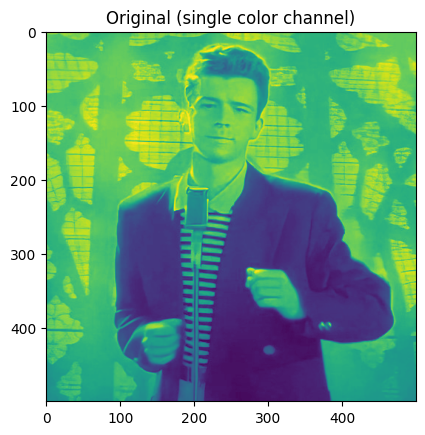

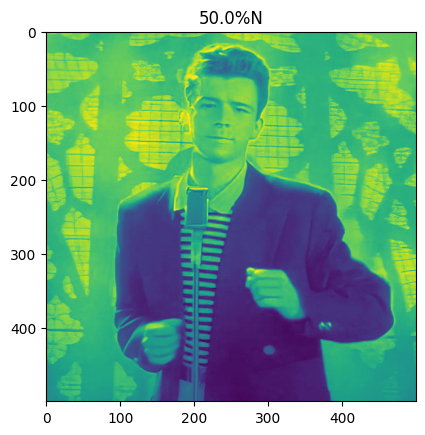

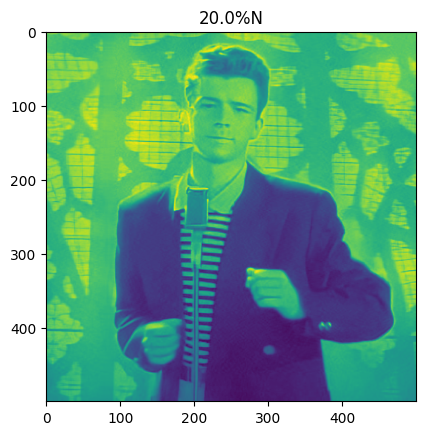

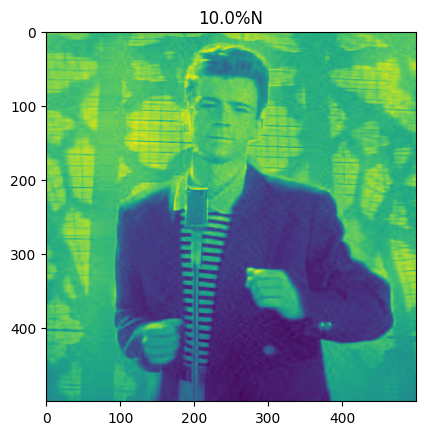

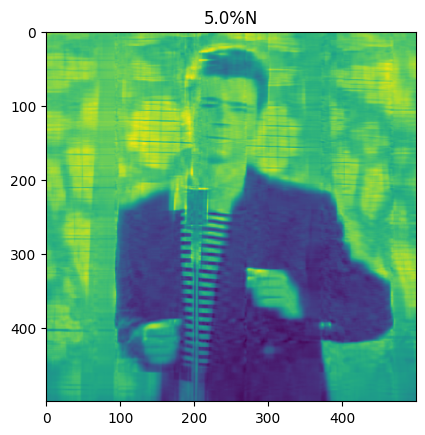

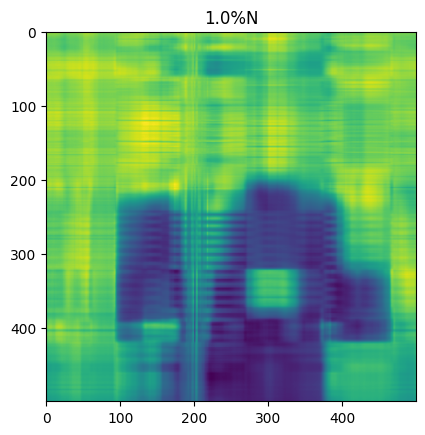

In [4]:
from PIL import Image
img = Image.open('GITHUB_LOGO.jpg')
red = np.asarray(img)[:,:,0]   # the last index selects the RG or B component
green = np.asarray(img)[:,:,1]
blue = np.asarray(img)[:,:,2]

def matrix_compress(matrix, ratio = 0.5):   # high ratio -> high image quality
    
    # like discribed earlier, if the image is longer vertically, rotate it 90 degress
    # so that my function can operate it
    if np.shape(matrix)[0] < np.shape(matrix)[1]:
        matrix = matrix.transpose()
        uu, ssdiag, vtt = np.linalg.svd(matrix, full_matrices=False)
        stop = int(ratio * np.shape(uu)[1])
        
        # rotate it back to output
        return sum_comp(uu, ssdiag, vtt, truncate=True, stop= stop).transpose()
    else:
        uu, ssdiag, vtt = np.linalg.svd(matrix, full_matrices=False)
        stop = int(ratio * np.shape(uu)[1])
        return sum_comp(uu, ssdiag, vtt, truncate=True, stop= stop)


# plot the original picture for comparison
print(np.shape(red))
plt.imshow(red)
plt.title("Original (single color channel)")
plt.show()

# plot for different compressing ratio
ratio = [0.5, 0.2, 0.1, 0.05, 0.01]
for r in ratio:
    plt.imshow(matrix_compress(red, ratio = r))
    plt.title(str(100*r) + "%N")
    plt.show()


### Fitting planetary orbits

a)

The fitting x values converges surprisingly fast, only taking about 100 timesteps to stablize.

I demand that when error is smaller than 0.000001, the fitting loop stops, it takes 133 steps to hit desired precision.

The fitting data shows incrediable precision and converge really fast to the best-fit value. 

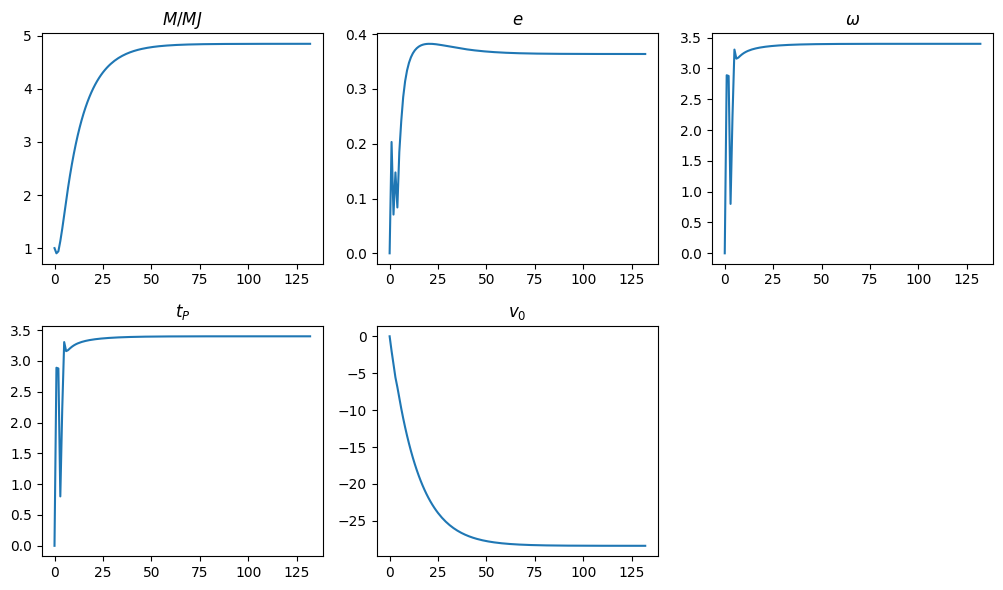

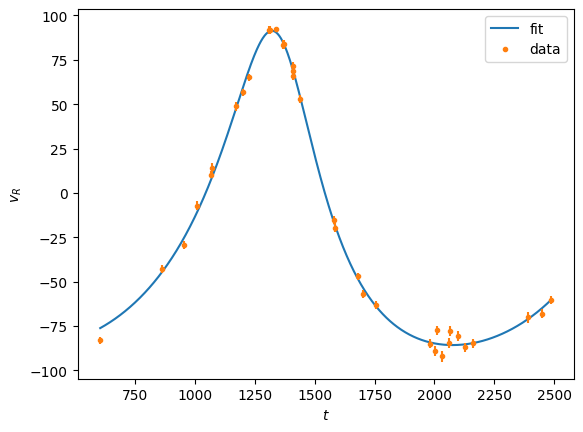

In [10]:
# importind data:

tobs, vobs, eobs = np.loadtxt('rvs.txt', unpack=True)
P = 1724


# This function is imported from class exercise to calculate velocity of star at given time

def rv(t, P, x):
    # Calculates the radial velocity of a star orbited by a planet
    # at the times in the vector t
    
    # extract the orbit parameters
    # P, t and tp in days, mp in Jupiter masses, v0 in m/s  
    mp, e, omega, tp, v0 = x
        
    # mean anomaly
    M = 2*np.pi * (t-tp) / P
    
    # velocity amplitude
    K = 204 * P**(-1/3) * mp  / np.sqrt(1.0-e*e) # m/s
    
    # solve Kepler's equation for the eccentric anomaly E - e * np.sin(E) = M
    # Iterative method from Heintz DW, "Double stars", Reidel, 1978
    # first guess
    E = M + e*np.sin(M)  + ((e**2)*np.sin(2*M)/2)
    while True:
        E0 = E 
        M0 = E0 - e*np.sin(E0)
        E = E0 + (M-M0)/(1.0 - e*np.cos(E0))
        if np.max(np.abs((E-E0))) < 1e-6:
            break
        
    # evaluate the velocities
    theta = 2.0 * np.arctan( np.sqrt((1+e)/(1-e)) * np.tan(E/2))
    vel = v0 + K * ( np.cos(theta + omega) + e * np.cos(omega))
    return vel



# This function is to calculate the A matrix of a certain set of x (5 parameters)
# Using finite differentiation method
def get_matrix_A(t, P, x):
    
    # Construct empty matrix A
    A =  np.zeros([len(t), len(x)])
    eps = 1e-7                       # Small changes in x
    velo = rv(t, P, x)               # local value of velocity evaluated at x

    # change x values one by one, and code their dv/dx in matrix A
    v_mp = rv(t, P, x = x + np.array([eps, 0, 0, 0, 0]))
    A[:, 0] = (v_mp - velo)/(eps)

    v_e = rv(t, P, x = x + np.array([0, eps, 0, 0, 0]))
    A[:, 1] = (v_e - velo)/(eps)

    v_omega = rv(t, P, x = x + np.array([0, 0, eps, 0, 0]))
    A[:, 2] = (v_omega - velo)/(eps)

    v_tp = rv(t, P, x = x + np.array([0, 0, 0, eps, 0]))
    A[:, 3] = (v_tp - velo)/(eps)

    v_v0 = rv(t, P, x = x + np.array([0, 0, 0, 0, eps]))
    A[:, 4] = (v_v0 - velo)/(eps)

    return velo, A                  # for convenience, velo is calculated anyway

# chi-square function
def chi_square (x, tobs, vobs, eobs):
    chisq = np.sum(((vobs-rv(tobs, P, x))/eobs)**2)
    return chisq


# Initial guess   
x = np.array([1.0, 0.0, 0.0, 0.0, 0.0])
# create an array to track the change of x
x_history = np.array([x])


err = 0.0
alpha = 0.2
lam = 0.001


# implement Levenberg-Marquardt methods
timesteps = 250
for i in range(timesteps):

    f, AAA = get_matrix_A(tobs, P, x)
    res = (vobs - f) / eobs
    chi2 = chi_square(x, tobs, vobs, eobs)

    # perpose a try with newton method, modified by lambda
    x_try = alpha * np.linalg.inv(AAA.T @ AAA @ (np.identity(5)*(1+lam))) @ (AAA.T @ res)

    if chi_square(x + x_try, tobs, vobs, eobs) < chi2:    # jump
        x += x_try
        x_history = np.insert(x_history, 0, x, axis= 0)   # store x history value ***
        lam = 0.1 * lam

    if chi_square(x + x_try, tobs, vobs, eobs) > chi2:    # no jump
        lam = 10 * lam
    
    # break loop when reaching desired precision
    err =np.sqrt(np.mean(res**2))
    if np.sqrt(np.mean(res**2)) <= 0.000001:
        break


t = np.linspace(tobs[0], tobs[-1], 1000)


# because of the way how I update x-his is np.insert see ***
# putting the new value in front of the old one, thus, I need to reverse it at the end
x_history = x_history[::-1]

# adjust omega, entricity, t_P
x_historyy = x_history.copy()
x_historyy[:, 1] = -1 * x_history[:, 1] 
x_historyy[:, 2] = x_history[:, 2]%(2*np.pi)   # clear extra phase
x_historyy[:, 3] = x_history[:, 2]%(2*np.pi)

plt.figure(figsize=(10,6))
titles = (r'$M/MJ$', r'$e$', r'$\omega$', r'$t_P$', r'$v_0$')
for i, title in enumerate(titles):
    plt.subplot(2,3,i+1)
    plt.title(title)
    plt.plot(list(range(len(x_historyy))), x_historyy[:, i])
plt.tight_layout()
plt.show()



# plot the fit results
plt.plot(t, rv(t,P, x), 'C0', label ="fit")
plt.plot(tobs, vobs, 'C1.', label = "data")
plt.errorbar(tobs, vobs, eobs, fmt='none', ecolor='C1')
plt.legend()
plt.ylabel(r'$v_{R}$')
plt.xlabel(r'$t$')
plt.show()

b)

The **C** matrix for Levenberg-Marquardt and MCMC are almost identitical. I plot them in log space just to see the distribution bettter, because some number has a very large absolute error, in normal scale it won't be any difference.

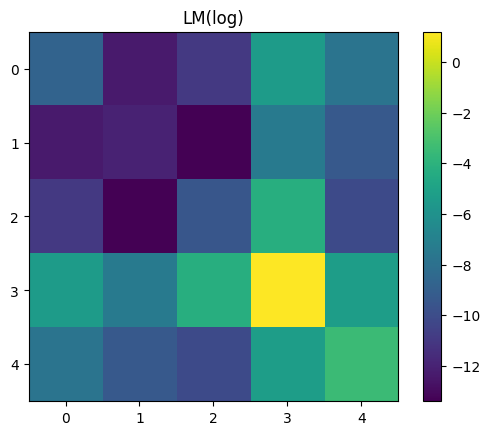

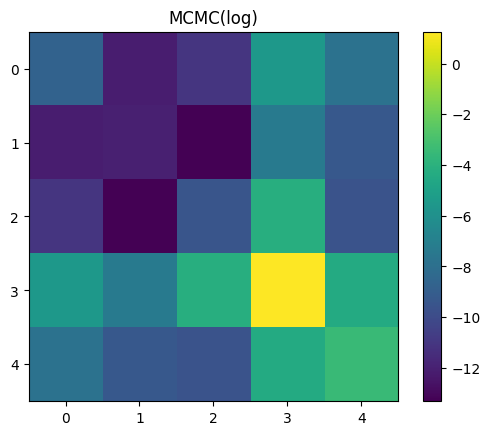

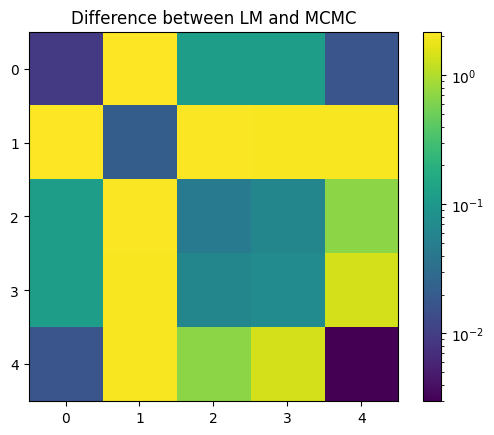

In [28]:
from matplotlib import colors
# the covariance matrix for best fit with LM method:

ff, AA = get_matrix_A(tobs, P, x)

LMC = np.linalg.inv(AA.T @ AA)
lmc_log = np.log(np.abs(LMC))


plt.imshow(lmc_log)
plt.colorbar()
plt.title("LM(log)")
plt.show()


# for MCMC:
# the results are imported
xxx = np.array([ 4.83846322e+00,  3.60694725e-01,  3.04891515e-01, -3.58669506e+02, -2.79063903e+01])

ffff, AAAA = get_matrix_A(tobs, P, xxx)

MCMCC = np.linalg.inv(AAAA.T @ AAAA)
mcmc_log = np.log(np.abs(MCMCC))

plt.imshow(mcmc_log) 
plt.title("MCMC(log)")
plt.colorbar()
plt.show()


plt.imshow(np.abs((MCMCC - LMC)/LMC), norm=colors.LogNorm())
plt.colorbar()
plt.title("Difference between LM and MCMC")
plt.show()
